In [10]:
from tensorflow.python.keras import Input
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, mean_absolute_percentage_error
from numpy import arange


There are 510 instances.
         x       y
0  10.5392  1.2058
1   5.1571  2.6770
2  12.6563  3.1471
3  11.7546  2.3668
4  10.9499  2.3400


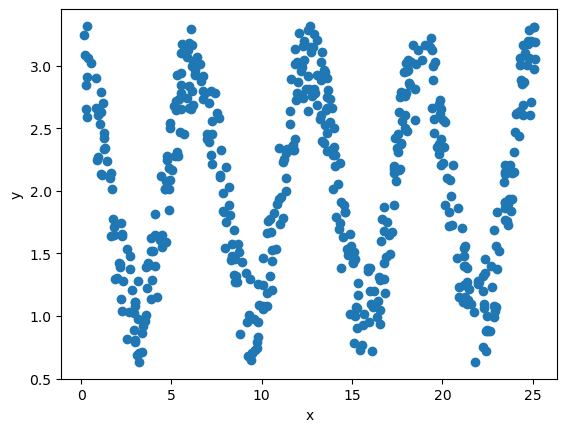

In [11]:
# Read dataset:
dataset = pd.read_csv('Lab10_train.csv')
print(f"There are {len(dataset.index)} instances.")
print(dataset.head())
plt.scatter(dataset['x'], dataset['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

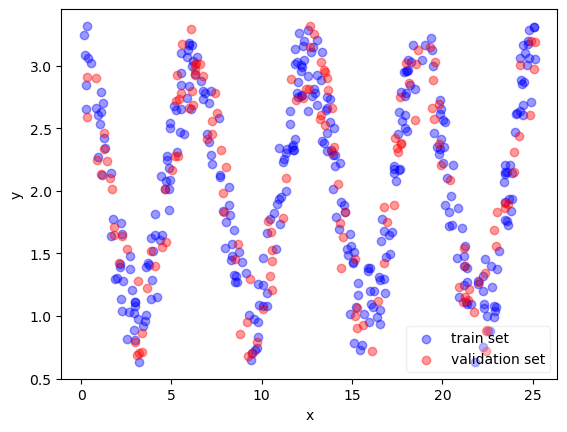

In [12]:
def split_dataset(dataset, train_frac=0.7):
    train = dataset.sample(frac=train_frac)
    val = dataset.drop(train.index)
    return train, val

# Split dataset into train and validation:
train, validation = split_dataset(dataset, train_frac=0.7)
plt.scatter(train['x'], train['y'], c='blue', alpha=0.4)
plt.scatter(validation['x'], validation['y'], c='red', alpha=0.4)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['train set', 'validation set'], framealpha=0.3)
plt.show()


In [13]:
# # Create model structure
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras import Input
# from tensorflow.python.keras.layers import Dense

In [14]:
# # Create model:
# model = Sequential()
# model.add(Input(shape=(1,)))
# model.add(Dense(200, activation='sigmoid'))
# model.add(Dense(200, activation='sigmoid'))
# model.add(Dense(200, activation='sigmoid'))
# model.add(Dense(1, activation='linear'))
# print(model.summary())


In [15]:
import tensorflow as tf
import keras
from keras import layers, models

In [16]:
# create model
model = keras.Sequential()
model.add(keras.layers.InputLayer(shape=(1,)))
model.add(keras.layers.Dense(200, activation='sigmoid'))
model.add(keras.layers.Dense(200, activation='sigmoid'))
model.add(keras.layers.Dense(200, activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='linear'))
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 200)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,001 (316.41 KB)

 Trainable params: 81,001 (316.41 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
# Train:
loss = 'mse'
metric = 'mae'

epochs = 1750

# dataset is split ‘X’ as input to model
# ‘Y’ as the expected output of model 
x_train, y_train = train['x'], train['y']
x_val, y_val = validation['x'], validation['y']
model.compile(loss=loss, optimizer='adam', metrics=[metric])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=1, validation_data=(x_val, y_val))


Epoch 1/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6939 - mae: 1.3870 - val_loss: 1.2033 - val_mae: 0.8634
Epoch 2/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2126 - mae: 0.8964 - val_loss: 0.6340 - val_mae: 0.6614
Epoch 3/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6173 - mae: 0.6628 - val_loss: 0.8421 - val_mae: 0.7762
Epoch 4/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7563 - mae: 0.7313 - val_loss: 0.5925 - val_mae: 0.6756
Epoch 5/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5687 - mae: 0.6717 - val_loss: 0.6378 - val_mae: 0.6624
Epoch 6/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6315 - mae: 0.6713 - val_loss: 0.5647 - val_mae: 0.6564
Epoch 7/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5457 - mae: 0.6520 - val_loss: 0.6038 - val_mae: 0.6799
Epoch 8/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5554 - mae: 0.6600 - val_loss: 0.5648 - val_mae: 0.6563
Epoch 9/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5421 - mae:

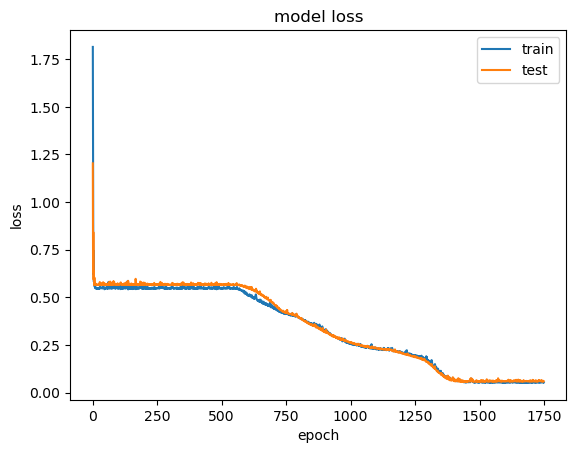

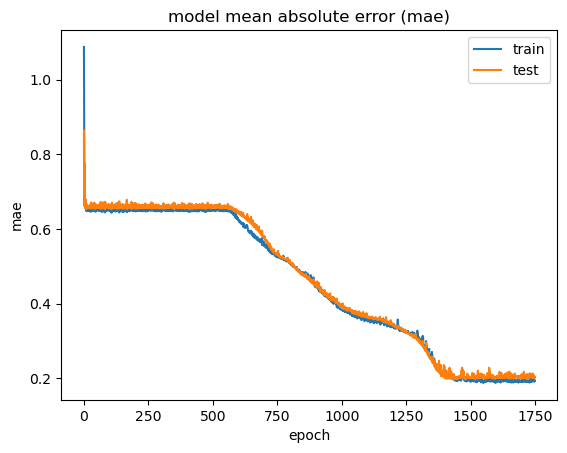

In [21]:
# Display loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Display metric:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error (mae)')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
